In [1]:
import pandas as pd

In [2]:
# Load the dataset
file_path = "AusApparalSales4thQrt2020.csv"
df = pd.read_csv(file_path)

# Display basic information and first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


(None,
          Date        Time State     Group  Unit  Sales
 0  1-Oct-2020     Morning    WA      Kids     8  20000
 1  1-Oct-2020     Morning    WA       Men     8  20000
 2  1-Oct-2020     Morning    WA     Women     4  10000
 3  1-Oct-2020     Morning    WA   Seniors    15  37500
 4  1-Oct-2020   Afternoon    WA      Kids     3   7500)

In [3]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format="%d-%b-%Y")

In [4]:
# Check for duplicates
duplicate_count = df.duplicated().sum()

In [5]:
# Check for unique values in categorical columns
unique_states = df['State'].unique()
unique_groups = df['Group'].unique()
unique_times = df['Time'].unique()

In [6]:
# Display results
duplicate_count, unique_states, unique_groups, unique_times

(np.int64(0),
 array([' WA', ' NT', ' SA', ' VIC', ' QLD', ' NSW', ' TAS'], dtype=object),
 array([' Kids', ' Men', ' Women', ' Seniors'], dtype=object),
 array([' Morning', ' Afternoon', ' Evening'], dtype=object))

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
# Trim spaces from categorical columns
df['State'] = df['State'].str.strip()
df['Group'] = df['Group'].str.strip()
df['Time'] = df['Time'].str.strip()

In [9]:
# Apply Min-Max Normalization to 'Unit' and 'Sales' columns
scaler = MinMaxScaler()
df[['Unit_Norm', 'Sales_Norm']] = scaler.fit_transform(df[['Unit', 'Sales']])

# Display first few rows after normalization
df.head()

,Date,Time,State,Group,Unit,Sales,Unit_Norm,Sales_Norm
0,2020-10-01,Morning,WA,Kids,8,20000,0.095238,0.095238
1,2020-10-01,Morning,WA,Men,8,20000,0.095238,0.095238
2,2020-10-01,Morning,WA,Women,4,10000,0.031746,0.031746
3,2020-10-01,Morning,WA,Seniors,15,37500,0.206349,0.206349
4,2020-10-01,Afternoon,WA,Kids,3,7500,0.015873,0.015873


In [10]:
# Perform descriptive statistics on 'Unit' and 'Sales' columns
desc_stats = df[['Unit', 'Sales']].describe()

# Identify groups generating highest and lowest sales
group_sales = df.groupby('Group')['Sales'].sum().sort_values(ascending=False)

# Identify states generating highest and lowest sales
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

# Display results
desc_stats, group_sales, state_sales

(              Unit          Sales
 count  7560.000000    7560.000000
 mean     18.005423   45013.558201
 std      12.901403   32253.506944
 min       2.000000    5000.000000
 25%       8.000000   20000.000000
 50%      14.000000   35000.000000
 75%      26.000000   65000.000000
 max      65.000000  162500.000000,
 Group
 Men        85750000
 Women      85442500
 Kids       85072500
 Seniors    84037500
 Name: Sales, dtype: int64,
 State
 VIC    105565000
 NSW     74970000
 SA      58857500
 QLD     33417500
 TAS     22760000
 NT      22580000
 WA      22152500
 Name: Sales, dtype: int64)

In [11]:
# Extract week, month, and quarter for time-based analysis
df['Week'] = df['Date'].dt.isocalendar().week
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

# Aggregate sales data for weekly, monthly, and quarterly trends
weekly_sales = df.groupby('Week')['Sales'].sum()
monthly_sales = df.groupby('Month')['Sales'].sum()
quarterly_sales = df.groupby('Quarter')['Sales'].sum()

# Display results
weekly_sales, monthly_sales, quarterly_sales

(Week
 40    15045000
 41    27002500
 42    26640000
 43    26815000
 44    21807500
 45    20865000
 46    21172500
 47    21112500
 48    21477500
 49    29622500
 50    31525000
 51    31655000
 52    31770000
 53    13792500
 Name: Sales, dtype: int64,
 Month
 10    114290000
 11     90682500
 12    135330000
 Name: Sales, dtype: int64,
 Quarter
 4    340302500
 Name: Sales, dtype: int64)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

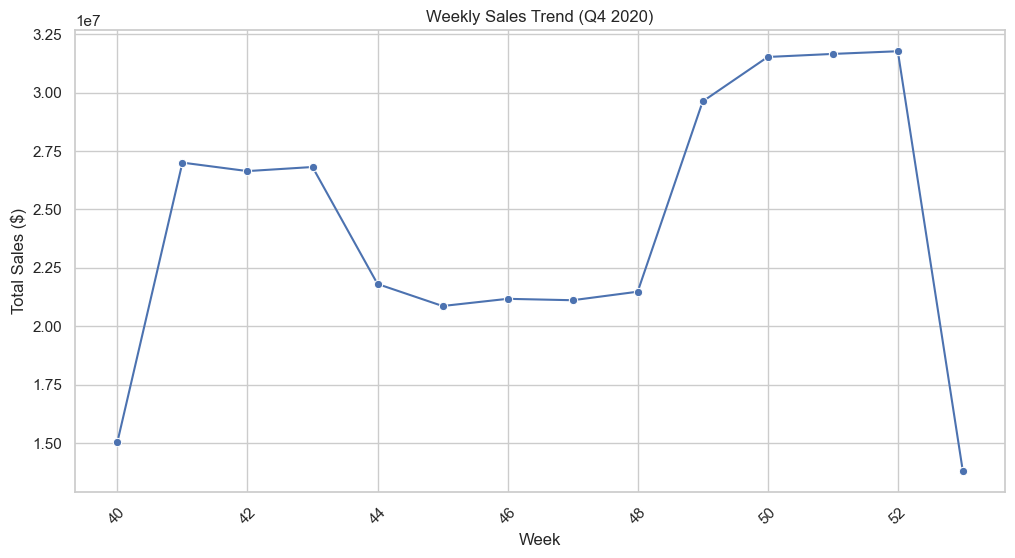

C:\Users\Riya\AppData\Local\Temp\ipykernel_28908\2084450700.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="Blues_d")


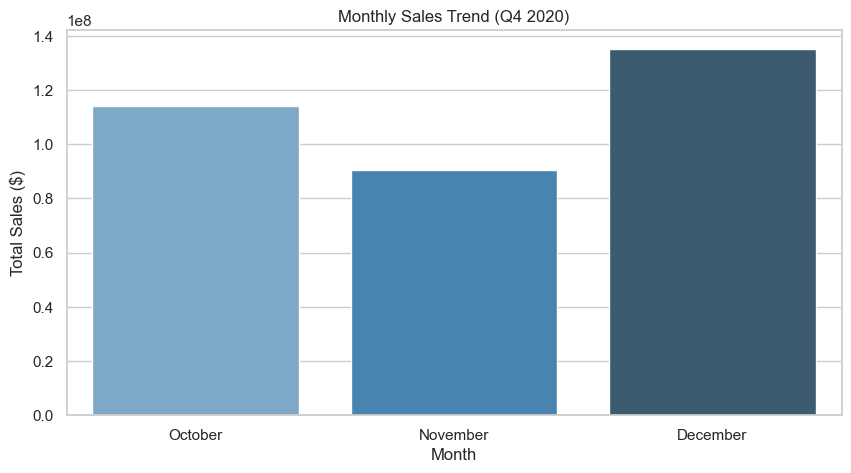

C:\Users\Riya\AppData\Local\Temp\ipykernel_28908\2084450700.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.index, y=state_sales.values, palette="coolwarm")


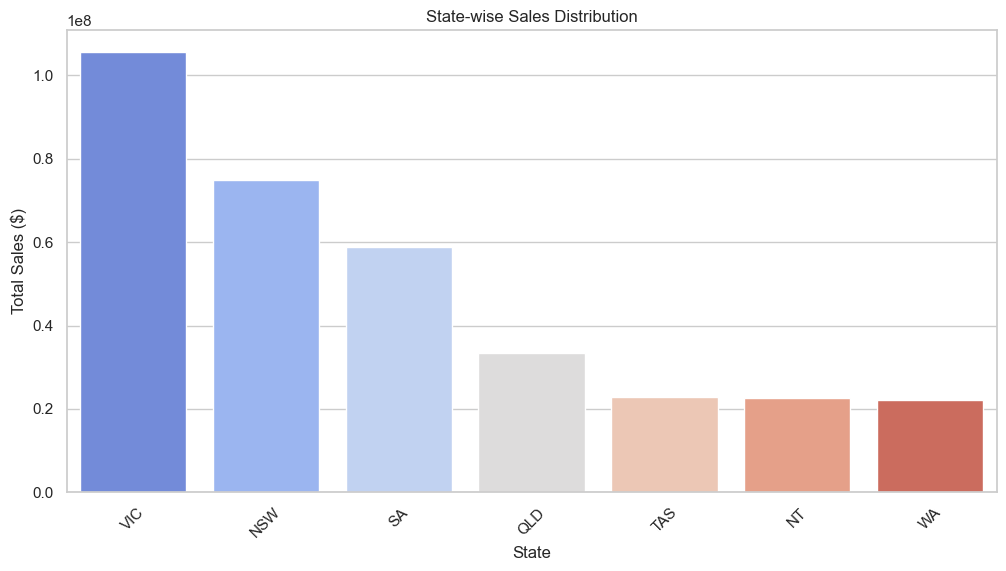

In [13]:
# Set seaborn style
sns.set_theme(style="whitegrid")

# Plot Weekly Sales Trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=weekly_sales.index, y=weekly_sales.values, marker='o', color='b')
plt.title("Weekly Sales Trend (Q4 2020)")
plt.xlabel("Week")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot Monthly Sales Trend
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="Blues_d")
plt.title("Monthly Sales Trend (Q4 2020)")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.xticks([0, 1, 2], ["October", "November", "December"])
plt.show()

# Plot State-wise Sales
plt.figure(figsize=(12, 6))
sns.barplot(x=state_sales.index, y=state_sales.values, palette="coolwarm")
plt.title("State-wise Sales Distribution")
plt.xlabel("State")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()

C:\Users\Riya\AppData\Local\Temp\ipykernel_28908\1687253989.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_sales.index, y=group_sales.values, palette="viridis")


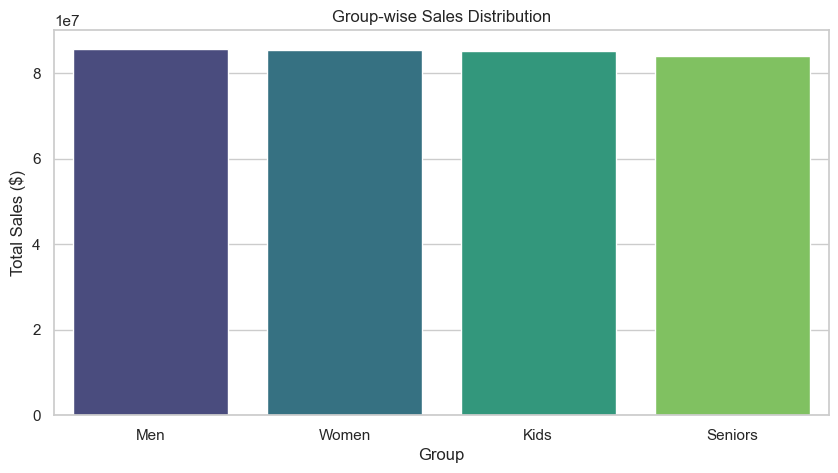

C:\Users\Riya\AppData\Local\Temp\ipykernel_28908\1687253989.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_sales.index, y=time_sales.values, palette="magma")


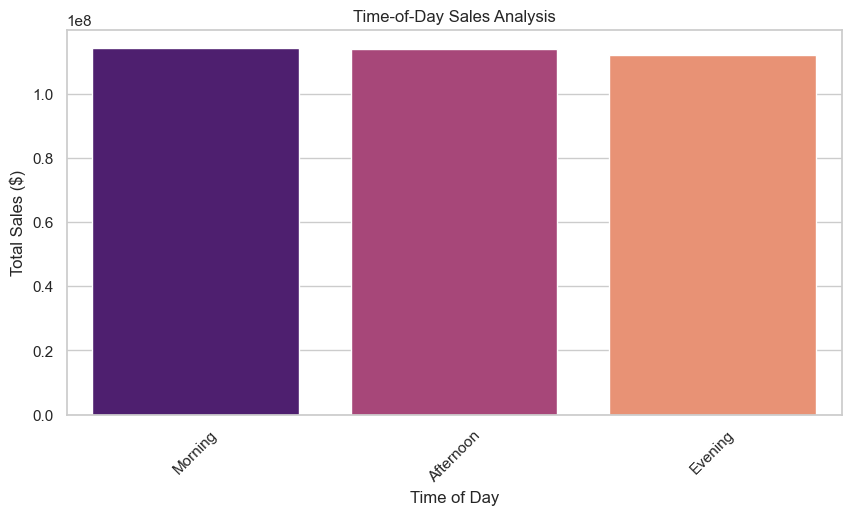

In [14]:
# Group-wise Sales Analysis
plt.figure(figsize=(10, 5))
sns.barplot(x=group_sales.index, y=group_sales.values, palette="viridis")
plt.title("Group-wise Sales Distribution")
plt.xlabel("Group")
plt.ylabel("Total Sales ($)")
plt.show()

# Time-of-Day Sales Analysis
time_sales = df.groupby('Time')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=time_sales.index, y=time_sales.values, palette="magma")
plt.title("Time-of-Day Sales Analysis")
plt.xlabel("Time of Day")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()